In [1]:
import json
import os

import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
recall_raw_dir = "/oak/stanford/groups/akundaje/atwang/finemo_gpu_test/K562/obs_a_0.6_c_0.0005_v9/modisco_raw/modisco_recall_data"
recall_unscaled_dir = "/oak/stanford/groups/akundaje/atwang/finemo_gpu_test/K562/obs_a_0.6_c_0.0005_v9/modisco_unscaled/modisco_recall_data"

seqlet_counts_path = "/oak/stanford/groups/akundaje/atwang/finemo_gpu_test/K562/obs_a_0.6_c_0.0005_v9/modisco_raw/modisco_recall_data/seqlet_counts.json"

In [3]:
with open(seqlet_counts_path) as f:
    seqlet_counts = json.load(f)

In [4]:
def load_data(recall_raw_dir, recall_unscaled_dir, motif_name):
    recall_raw_path = os.path.join(recall_raw_dir, f"{motif_name}.txt.gz")
    recall_unscaled_path = os.path.join(recall_unscaled_dir, f"{motif_name}.txt.gz")

    recall_raw = np.loadtxt(recall_raw_path)
    recall_unscaled = np.loadtxt(recall_unscaled_path)

    return recall_raw, recall_unscaled

In [5]:
def plot_recall(recall_raw, recall_unscaled, num_seqlets):    
    num_hits = recall_raw.shape[0]
    x = np.arange(num_hits)

    bound = np.full(num_hits, num_seqlets)
    ramp_max = min(num_seqlets, num_hits)
    bound[:ramp_max] = np.arange(1, ramp_max + 1)
    bound = bound.astype(float) / float(num_seqlets)
    
    plt.plot(x, recall_raw, label="Coefficients")
    plt.plot(x, recall_unscaled, label="Cross-Correlation")
    plt.plot(x, bound, label="Upper limit")
    plt.xlabel("Hit rank")
    plt.ylabel("Recall")

    plt.legend()
    
    plt.show()

    plt.close()

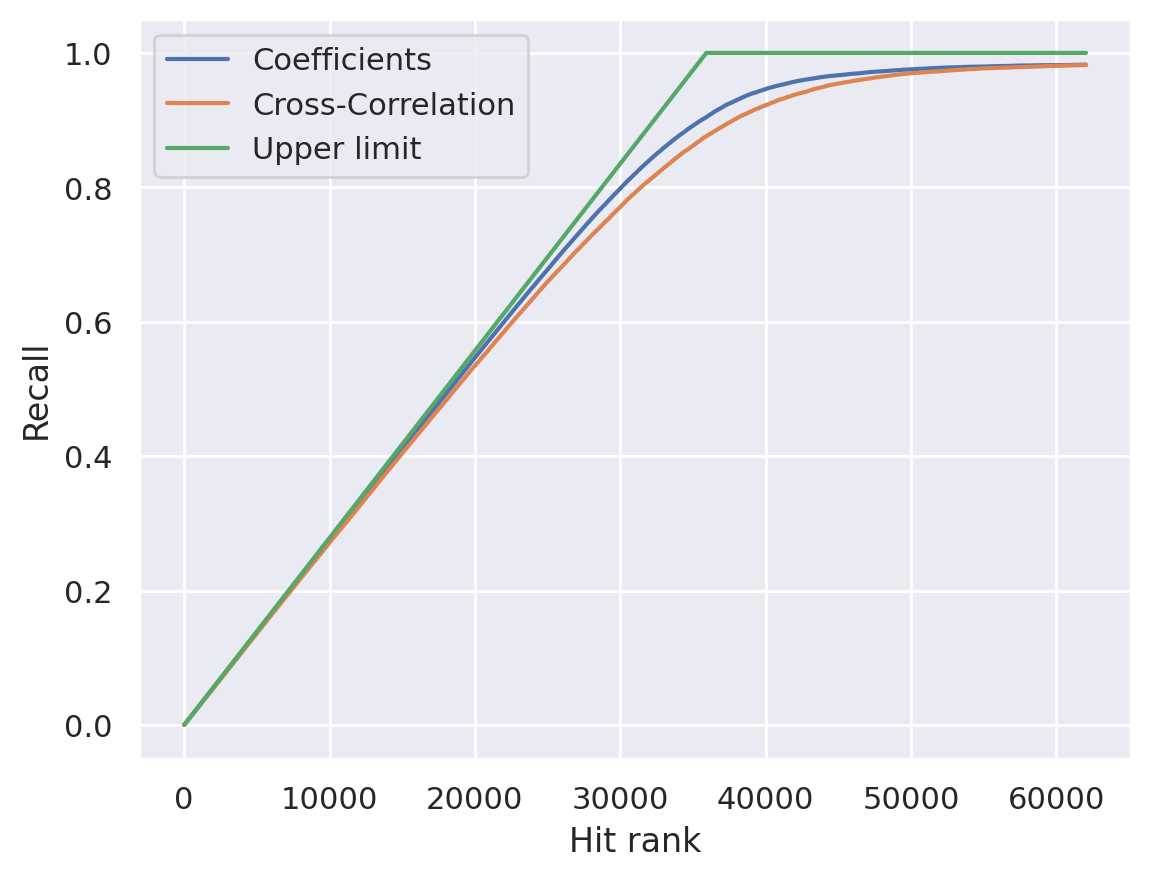

In [6]:
# CTCF
motif_name = "pos_patterns.pattern_1"

recall_raw, recall_unscaled = load_data(recall_raw_dir, recall_unscaled_dir, motif_name)
plot_recall(recall_raw, recall_unscaled, seqlet_counts[motif_name])

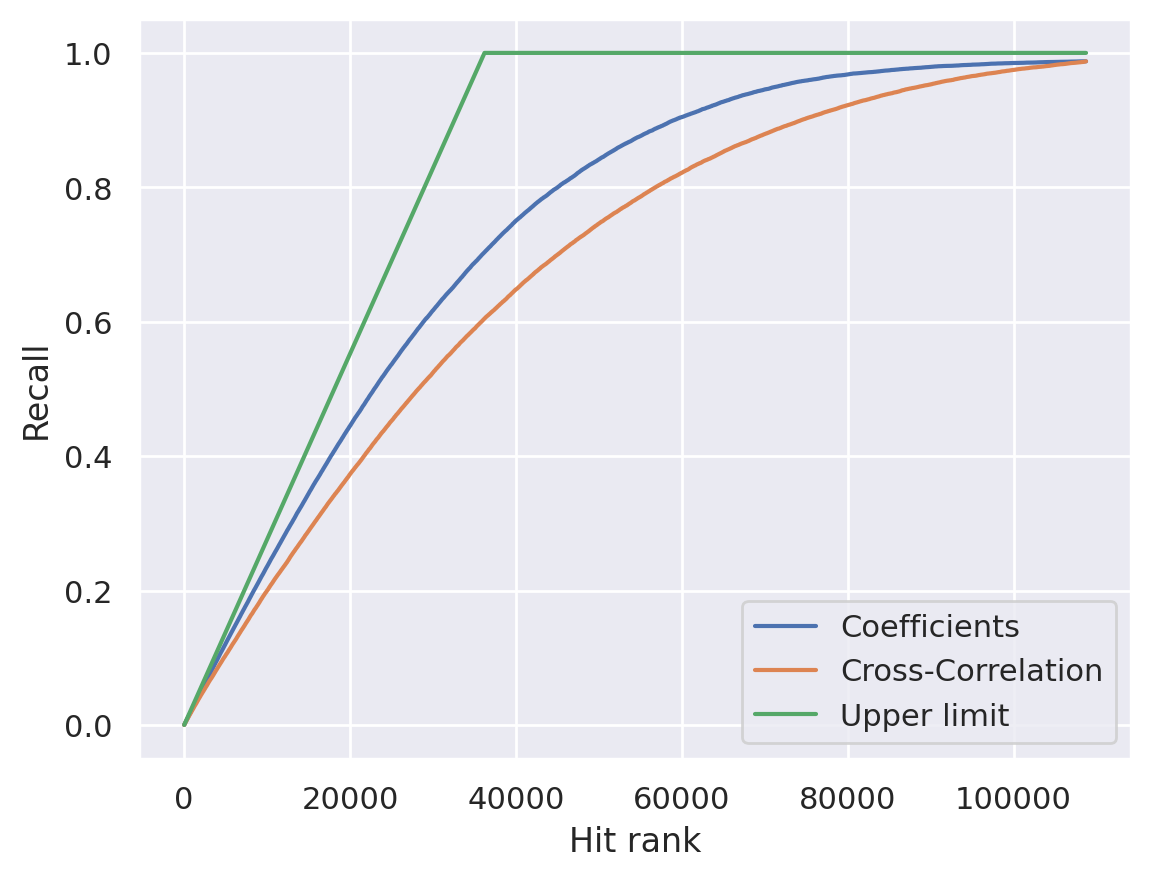

In [7]:
# GATA
motif_name = "pos_patterns.pattern_0"

recall_raw, recall_unscaled = load_data(recall_raw_dir, recall_unscaled_dir, motif_name)
plot_recall(recall_raw, recall_unscaled, seqlet_counts[motif_name])

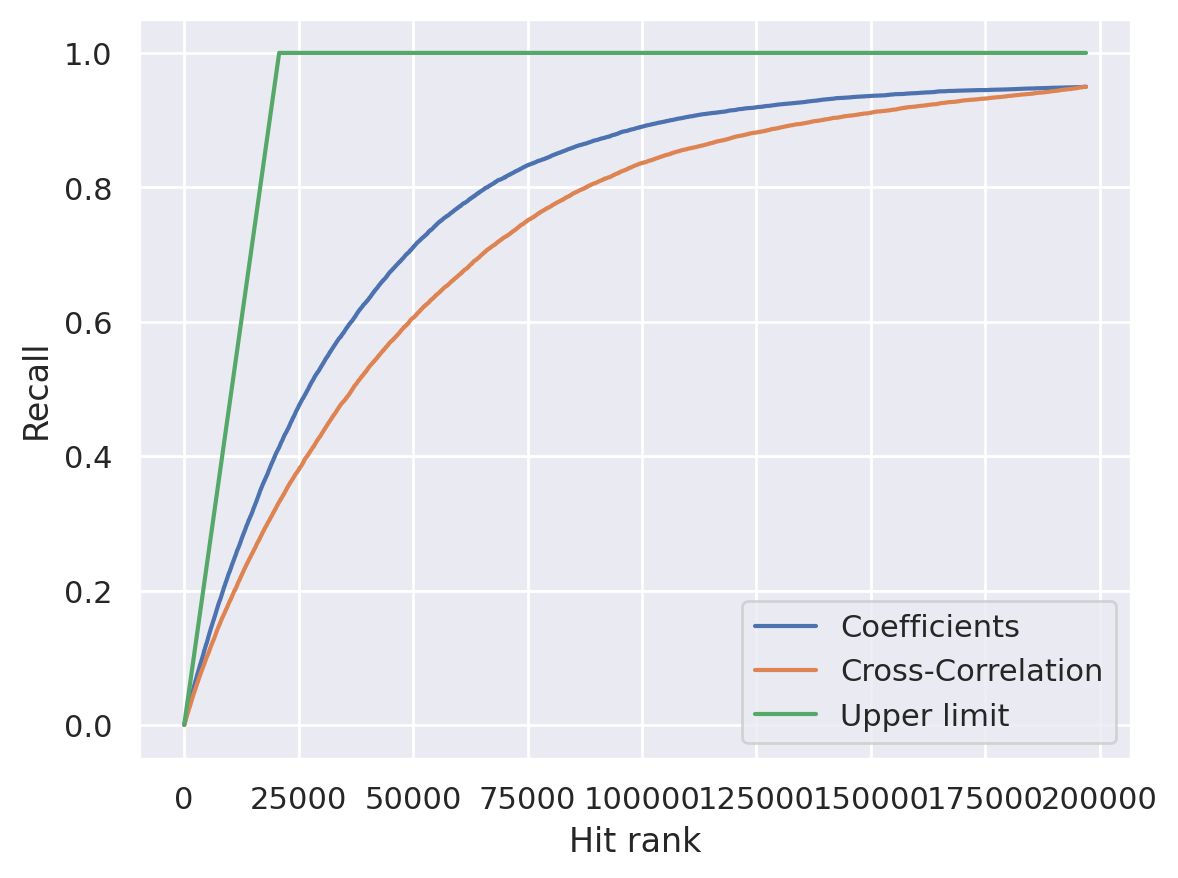

In [8]:
# SP1
motif_name = "pos_patterns.pattern_2"

recall_raw, recall_unscaled = load_data(recall_raw_dir, recall_unscaled_dir, motif_name)
plot_recall(recall_raw, recall_unscaled, seqlet_counts[motif_name])

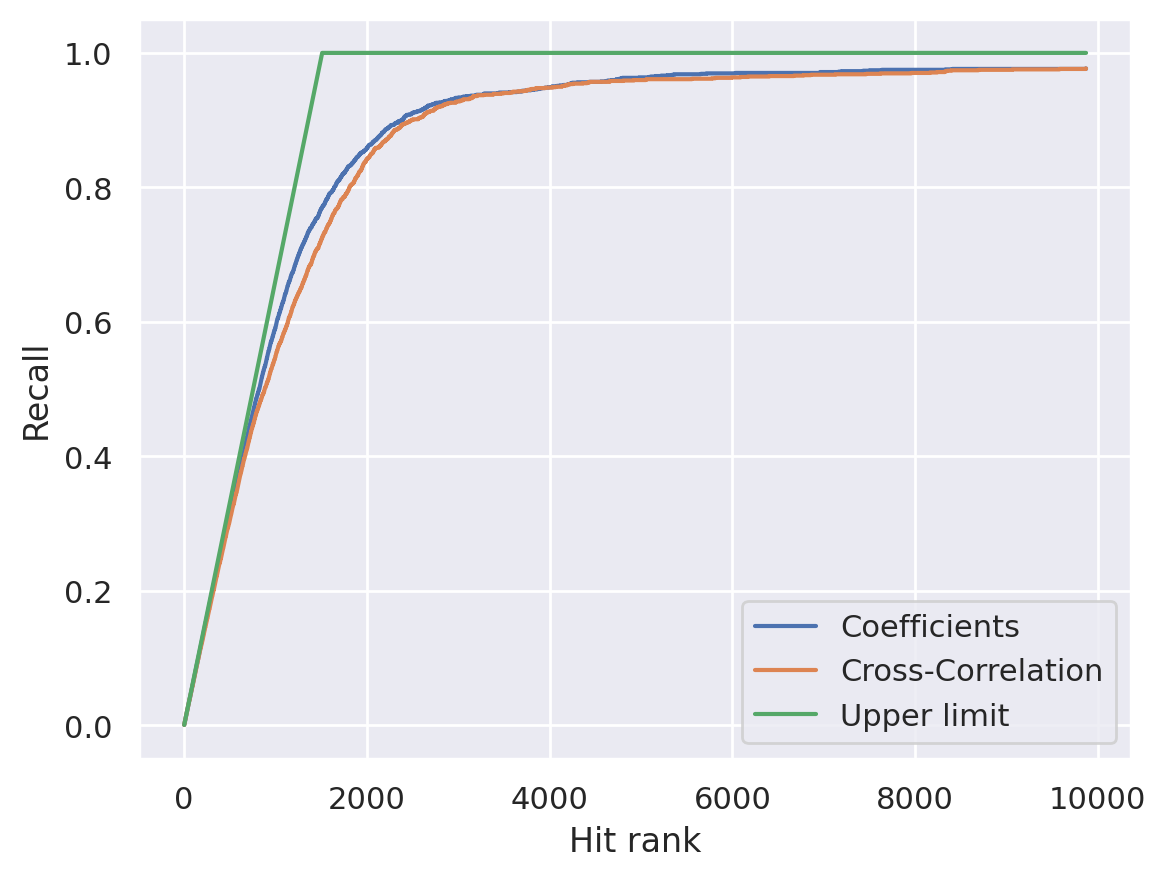

In [9]:
# YY1
motif_name = "pos_patterns.pattern_13"

recall_raw, recall_unscaled = load_data(recall_raw_dir, recall_unscaled_dir, motif_name)
plot_recall(recall_raw, recall_unscaled, seqlet_counts[motif_name])